# Open Exercise

Select from a (subset of a) dataset generated through [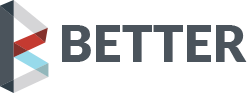](https://www.ec-better.eu/) and perform your own analysis, applying some of the techniques discussed before, or other techniques from your own choice.

* Amazon: CCD Products: Backscatter pre (band 0), post (band 1) and coherence (band 2) for fires detection and characterisation.

    Typical questions to answer:

    * [ ] When did the fire took place?

    * [ ] What are the areas affected and when?

    * [ ] What is the extension of the bunred area? And its evolution?

    * [ ] Can we validate it with external data sources? Can we correlate it with other indicators?

* CharPiya: Backscatter per date.

    Typical questions to answer:

    * [ ] When did the construction of the camp took place? Do you identify different phases in the construction?

    * [ ] What is the extension of the camp?

    * [ ] Was there any flooding event? When? Did it affect the camp?

    * [ ] Can you validate or reference certain events with ancillary data?


In [1]:
!/opt/anaconda/envs/env_better/bin/pip3 install folium shapely rasterio bs4 tqdm

In [2]:
import rasterio
import rasterio.mask
import requests
import fiona
import json
import geojson
from shapely.geometry import shape
from tqdm import tqdm

In [3]:
full_island = {"type":"Feature", "properties":{}, "geometry":{"type":"Polygon", "coordinates":[[[91.240997090935, 22.411882288286], [91.247863546014, 22.258073694536], [91.452483907342, 22.263566858599], [91.444244161248, 22.42012203438], [91.240997090935, 22.411882288286]]]}, "crs":{"type":"name", "properties":{"name":"urn:ogc:def:crs:OGC:1.3:CRS84"}}}
g1 = geojson.loads(json.dumps(full_island))
g1

{"crs": {"properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}, "type": "name"}, "geometry": {"coordinates": [[[91.240997, 22.411882], [91.247864, 22.258074], [91.452484, 22.263567], [91.444244, 22.420122], [91.240997, 22.411882]]], "type": "Polygon"}, "properties": {}, "type": "Feature"}

In [4]:
from bs4 import BeautifulSoup
import requests


url_charpiya = 'https://store.terradue.com/nextgeoss-change-detection-s1/charpiya/'
url_amazon = 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/'
center_charpiya = [22.38, 91.4]

url = url_charpiya 
center = center_charpiya 

ext = 'tif'

def listFD(url, ext=''):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'html.parser')
    return [url + '/' + node.get('href') for node in soup.find_all('a') if node.get('href').endswith(ext)]

vector_fn = 'data/InsideCharpiya.shp'

#with fiona.open(vector_fn, 'r') as shapefile:
#    shapes = [feature['geometry'] for feature in shapefile]

shapes = g1['geometry']

masked_images = list()
dates = list()

with tqdm(total=19) as pbar:
    for file in listFD(url, ext):
        dates.append(file)
        with rasterio.open(file) as src:
            masked_data, masked_transform = rasterio.mask.mask(src, [shapes], crop=True) 
            masked_meta = src.meta
            bbox = shape(shapes).bounds
            img = masked_data[0]
            masked_images.append(img)
            pbar.update(1)
            


100%|██████████| 19/19 [02:21<00:00,  7.45s/it]


/opt/anaconda/envs/env_better/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


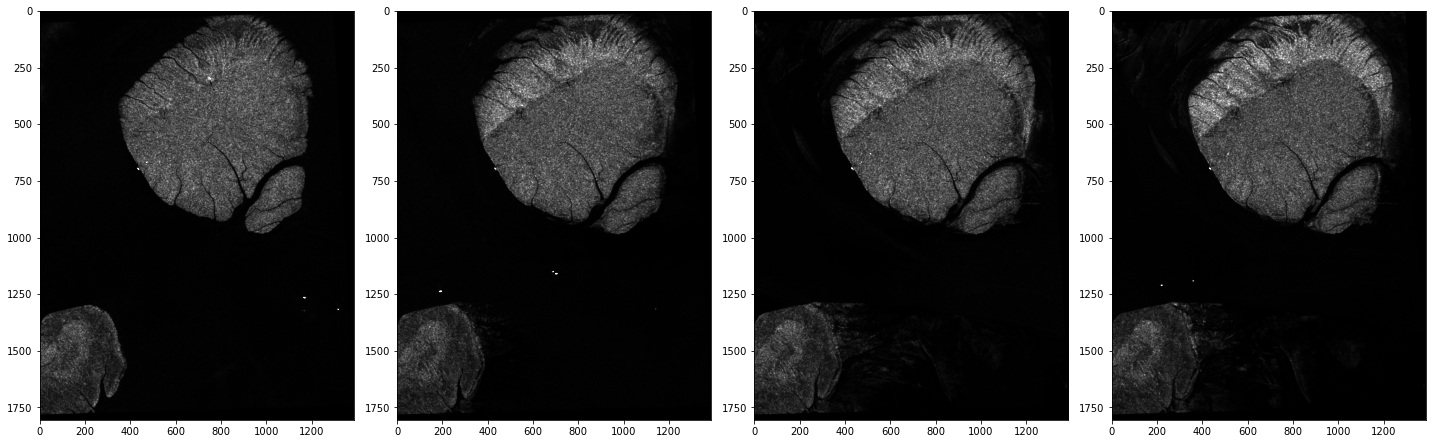

In [6]:
import numpy as np
from helpers import *

shape = (1805, 1386)

preview = np.dstack(img[0:shape[0],0:shape[1]] for img in masked_images[0:4])
plot_bands_row(preview, 0, 0.5)

preview = np.dstack(img[0:shape[0],0:shape[1]] for img in masked_images[4:8])
plot_bands_row(preview, 0, 0.5)

preview = np.dstack(img[0:shape[0],0:shape[1]] for img in masked_images[8:12])
plot_bands_row(preview, 0, 0.5)

preview = np.dstack(img[0:shape[0],0:shape[1]] for img in masked_images[12:16])
plot_bands_row(preview, 0, 0.5)

/opt/anaconda/envs/env_better/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


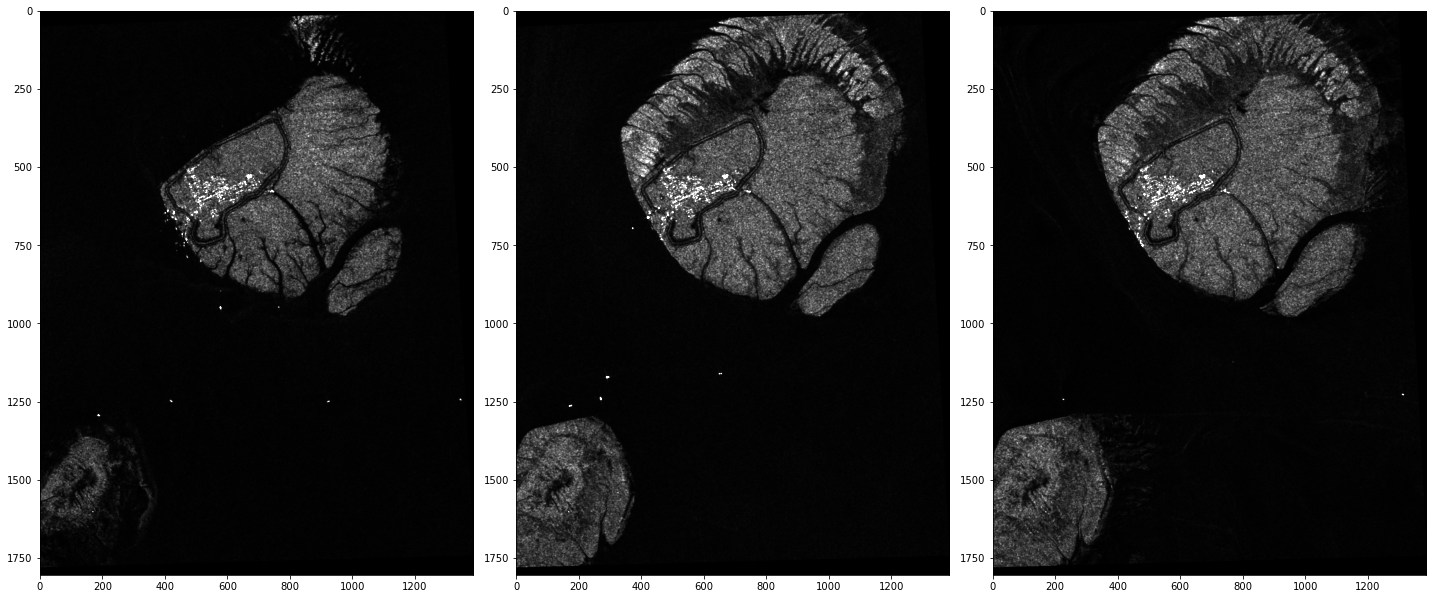

In [7]:
preview = np.dstack(img[0:shape[0],0:shape[1]] for img in masked_images[16:19])
plot_bands_row(preview, 0, 0.5)

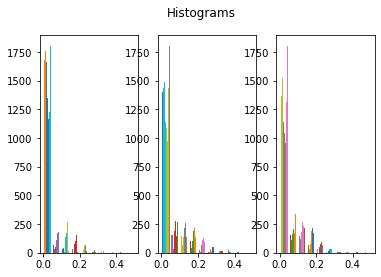

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3)
fig.suptitle('Histograms')

for i,img in enumerate(masked_images[16:19]):
    ax[i].hist(img[0:shape[0],0:shape[1]], range=(0,0.5)) 


### The histogram shows different modes, can we extract water as it is covering very much of the scene and we know it has low backscatter?

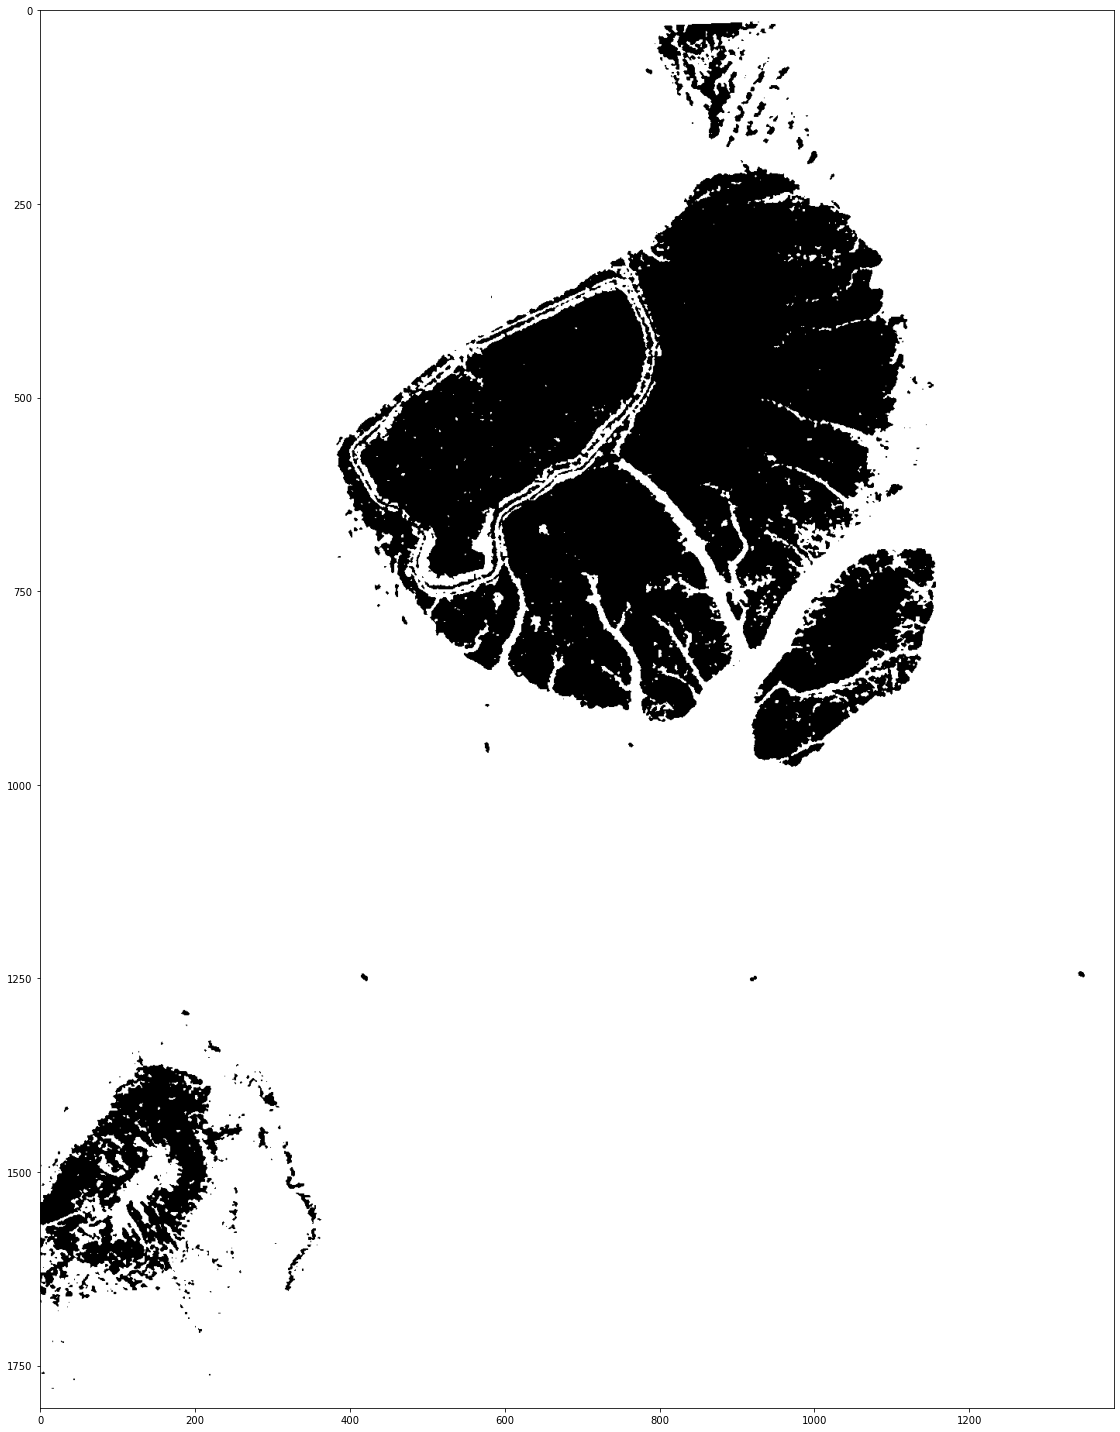

In [27]:
import numpy.ma as ma
from helpers import *

water_mask = [ma.masked_where(img < 0.05, img).mask for img in masked_images]

plot_bands_row(water_mask[16],0,1)


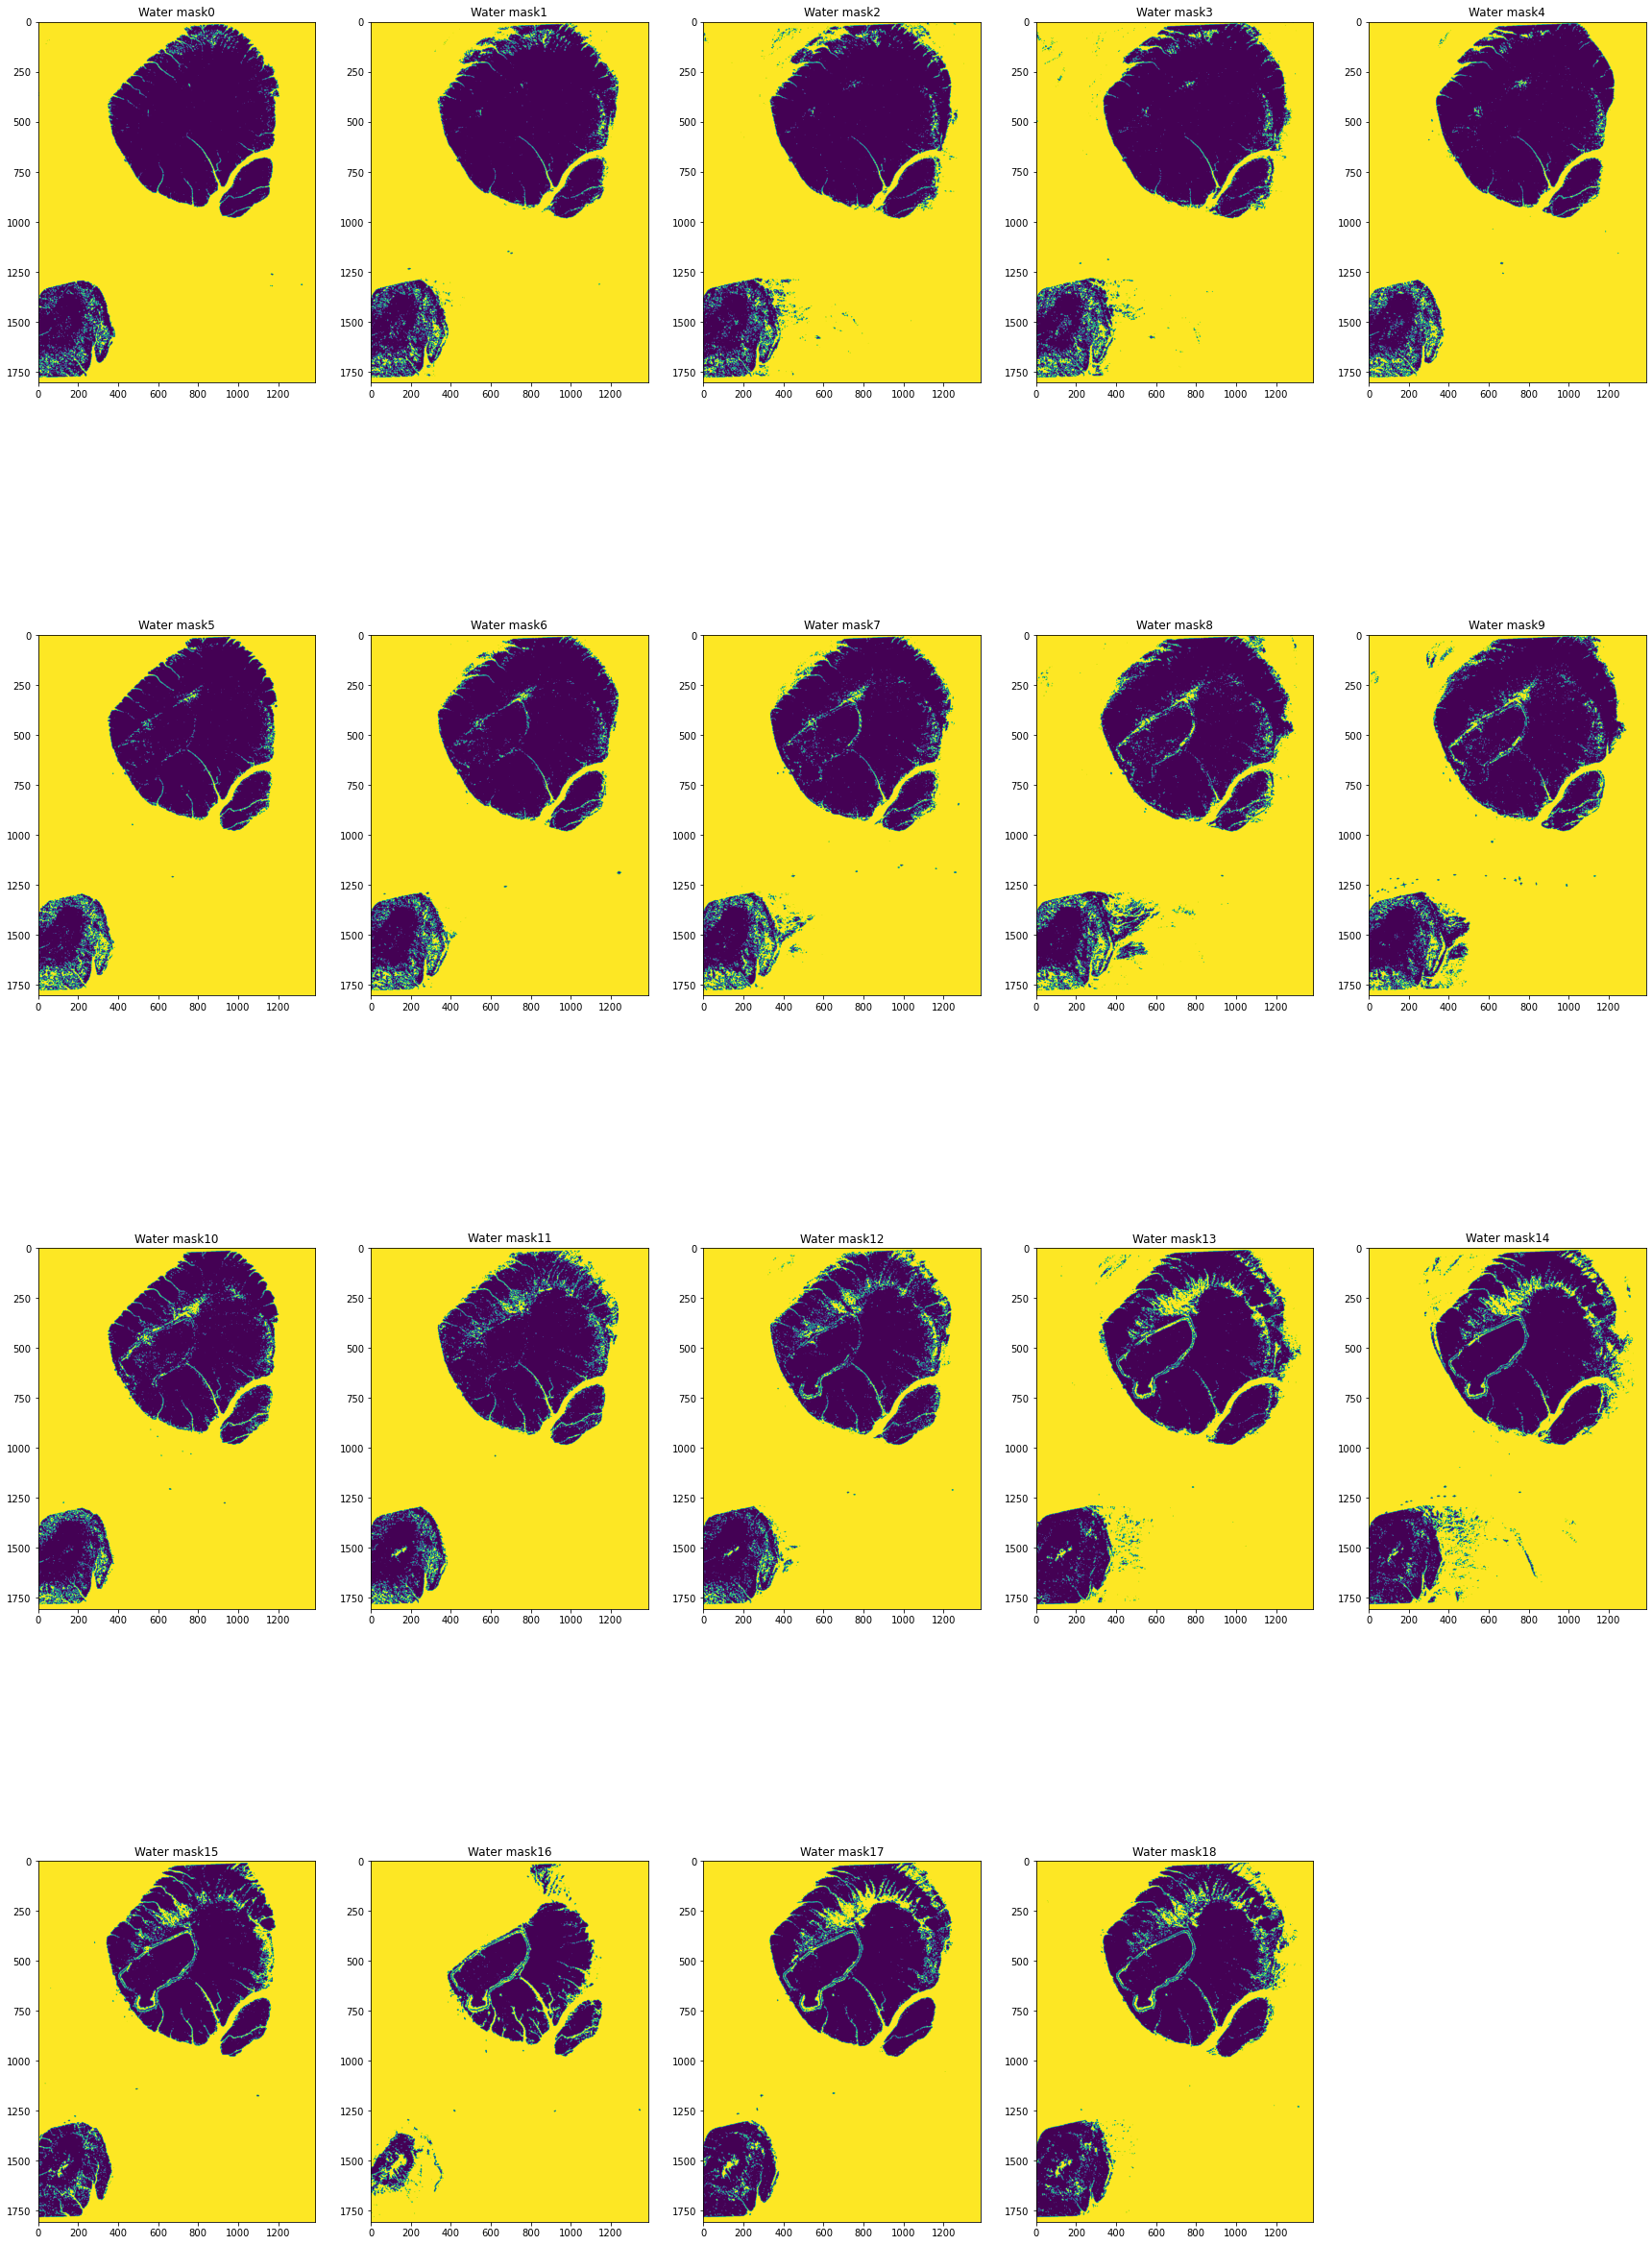

In [28]:
rows = 4
cols = 5
axes=[]
fig=plt.figure(figsize=(30,45))

for a in range(rows*cols-1):
    b = water_mask[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Water mask"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)

#fig.tight_layout()    
plt.show()


([<matplotlib.axis.XTick at 0x7fbf37395e10>,
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, '')])

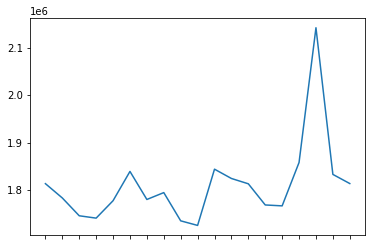

In [43]:
water_pixels = [np.sum(pixels == True) for pixels in water_mask]


fig = plt.figure()
ax = plt.axes()

labels = [name.rsplit('/', 1)[-1][23:31] for name in dates]

ax.plot(range(0,19), water_pixels);
plt.xticks(range(0,19), labels)